<a href="https://colab.research.google.com/github/Srajansstar/Stock-price-prediction-projectject/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [ ]:
# take input
stocks=input("give the code of stock to download ")
data = yf.download(stocks , "2019-05-01","2024-08-16" , auto_adjust =True) # download the datta from yahoo finance from the date to date
data.head()

#RVNL.BO

give the code of stock to download RVNL.BO


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-05-02,18.366936,20.412345,18.366936,19.953171,2548214
2019-05-03,20.203629,20.370601,19.285282,19.368769,716700
2019-05-06,19.160057,19.285286,18.659140,18.951342,643065
2019-05-07,19.160055,19.660970,18.951340,18.993082,481594
2019-05-08,19.076570,19.160057,18.784369,18.909597,388315


In [ ]:
data.shape

(1288, 5)

In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,1288.000000,1288.000000,1288.000000,1288.000000,1.288000e+03
mean,80.336917,82.366242,78.393778,80.251176,1.395969e+06
std,113.294994,116.764587,109.946756,113.209410,2.160306e+06
min,8.672603,9.845708,8.546911,9.217257,4.651000e+04
25%,20.696935,21.065124,20.194176,20.535518,3.777668e+05
50%,29.988152,30.293505,29.589765,29.852194,7.226370e+05
75%,74.438032,75.535653,72.731254,73.708767,1.449836e+06
max,638.400024,647.000000,622.900024,630.000000,2.426116e+07


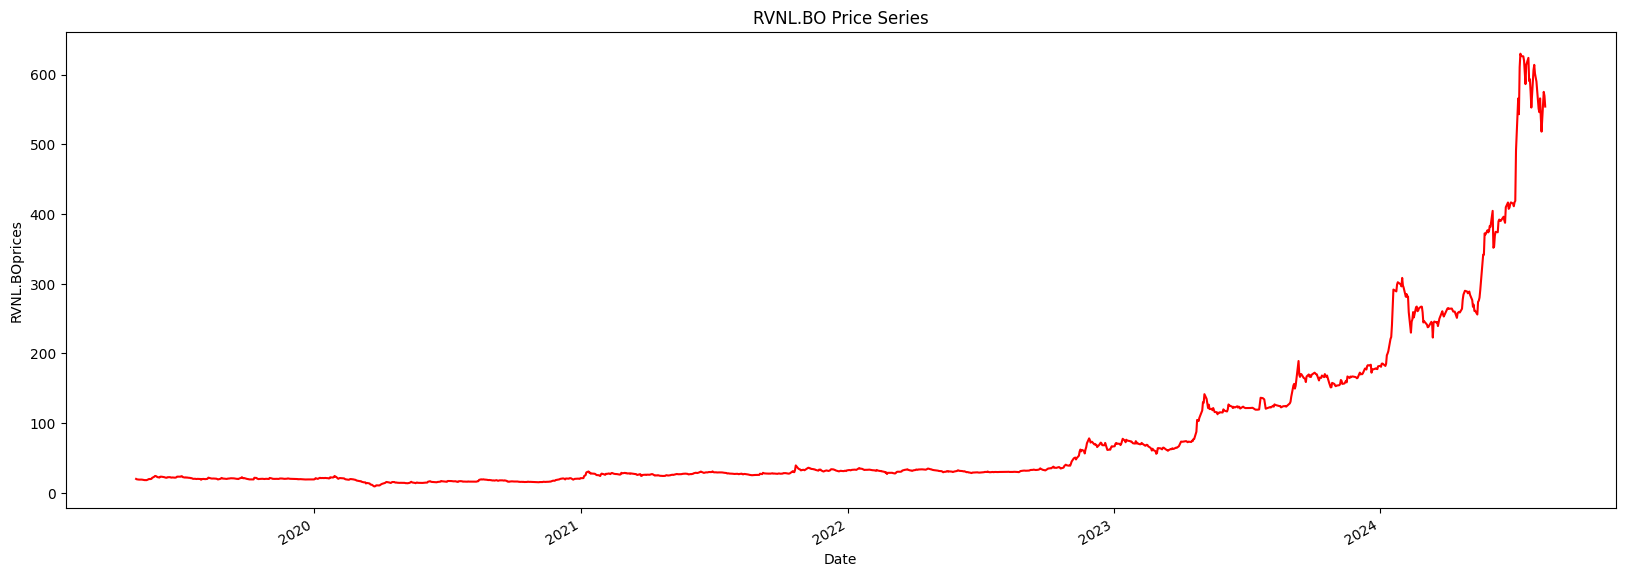

In [ ]:
data.Close.plot(figsize=(20,7),color='r')           #plot the stocks
plt.ylabel("{}prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<ipython-input-8-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

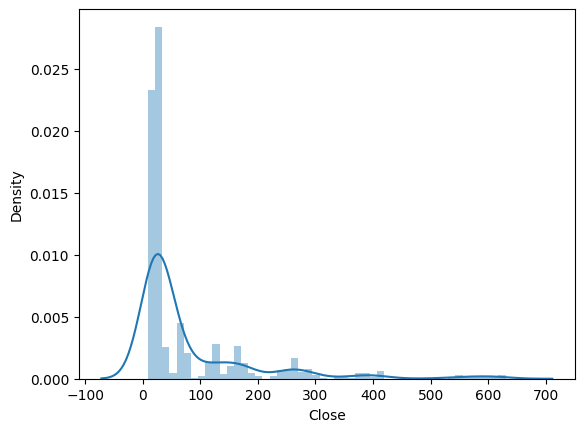

In [ ]:
sns.distplot(data["Close"])

<ipython-input-9-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

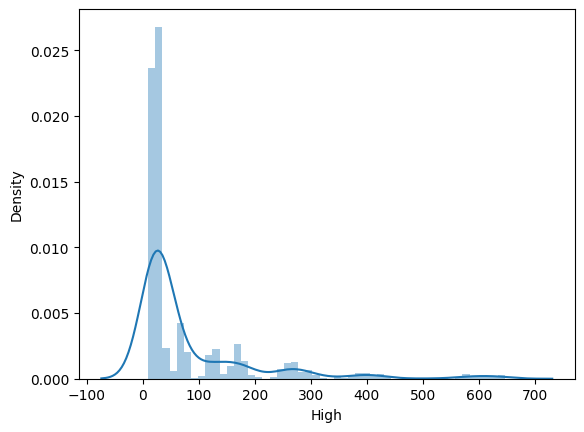

In [ ]:
sns.distplot(data["High"])

In [ ]:
#conclusion
#-shape of the data
#-how our data is distributed
#-its very very non linear

X=data.drop("Close",axis =1)
y=data['Close']

from sklearn.model_selection import train_test_split

#splitting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1030, 4)
(258, 4)
(1030,)
(258,)


In [ ]:
from sklearn.linear_model import LinearRegression
# using linear regresison to guess the stock price
lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
print(pred1)

[ 17.43006672  14.50094346  14.51331428  15.92026514 116.89112667
  16.28035289  12.03581687  22.1024655   19.45524528 392.37612715
  66.14088038  31.96255629  14.13545671  26.04812025 387.80769178
  19.90833926  32.62250393  25.47332031  49.5406657   19.72991908
  20.29206329  70.07403791 336.58936513 257.24636164  70.88871848
 130.4473731   17.77090096 161.45255748  21.05792942  24.94968993
 413.25501075  15.45145155  73.99895975  32.09163698 287.50359994
  18.13885461  16.14103467 257.69685898  32.53240737 416.61419323
 161.24394952 118.07990429 250.23337454  24.92988717  19.75501953
  20.02871486  26.71555321  27.86828513  17.53048387  22.64582732
  25.44074811  13.47545103 186.59023913  14.27625234 306.44847851
  31.97166394  19.31085985  29.96055559 123.9568658   27.63191689
 290.73526822 281.82285281  30.12714512  63.17910431  18.92556505
  19.39819954  21.67707303  20.32464626  24.30218985  27.07982843
 249.53662399  14.7597898   15.16173037  62.40100377 123.01563481
  14.20515

In [ ]:
y_test

,Close
Date,
2020-09-01,17.722273
2020-05-12,15.082787
2020-06-02,14.663821
2020-10-20,16.046410
2023-05-02,118.142143
...,...
2020-06-01,14.663821
2021-08-27,25.607157
2023-09-27,168.399994


In [ ]:
#MSE
#RMSE
#R2 SQUARE ->1 THEN GOOF
from sklearn.metrics import mean_squared_error,r2_score


def calculate_metrics(ytest, y_pred):
  """
  y_test is a grounf truth
  y_pred is predicted value
  """
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  r2_scor=r2_score(y_test,y_pred)

  print(f"meansquare erroe is\n{mse} and rmse is\n{rmse} and r2 score is\n{r2_scor}")


calculate_metrics(y_test,pred1)

meansquare erroe is
5.004581124117779 and rmse is
2.237092113462872 and r2 score is
0.9996388535516118


In [ ]:
from sklearn.linear_model import Lasso,Ridge
la = Lasso().fit(X_train,y_train)
ri = Ridge().fit(X_train,y_train)
la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.306e+03, tolerance: 1.292e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
calculate_metrics(y_test,la_p)

meansquare erroe is
10.086661360167849 and rmse is
3.1759504656351063 and r2 score is
0.9992721145214802


In [ ]:
calculate_metrics(y_test,ri_p)       #less prone to overfitting

meansquare erroe is
5.003103484018704 and rmse is
2.2367618299717793 and r2 score is
0.9996389601828084


In [ ]:
#using SVM Regressions

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.167 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.178 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.220 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.217 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.202 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.167 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.178 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.220 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.217 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.202 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.167 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.1, kernel='rbf')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

In [ ]:
import joblib
joblib.dump(ri,'model.pkl')
model = joblib.load('model.pkl')

In [ ]:
def preprocess(Open,High,Low,Volume):
  test_data=np.array([[Open,High,Low,Volume]])
  trained_model=joblib.load("model.pkl")
  prediction = trained_model.predict(test_data)
  return prediction

Open= 570
High= 578
Low= 562
Volume= 222764

print(preprocess(Open,High,Low,Volume))


[569.62984056]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
